# 🏡 **Unlocking the Secrets of Mortgages: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/DkfZnfD/image.png)

Welcome to the fascinating world of Mortgage Data, where numbers and trends come to life, telling the captivating story of Default Prediction, Customer Segmentation, and Property Purchase Trends. 🚀


## Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as srn
import swifter
from scipy.stats import zscore
from scipy import stats

## Loading Dataset & Head Entries

In [2]:
data = pd.read_csv("dataset.csv", encoding="ISO-8859-1", low_memory=False)

In [3]:
data['Property Value Range'] = data['Property Value Range'].str.replace('$', '', regex=False)

In [4]:
data.head(5)

,First_Name,Last_Name,Address,City,County,State,Zip,Property Type,Phone,Gender,...,Property Purchased Year,Property Built,Property Value Range,Mortgage Amount In Thousands,Lender Name,Interest Type,Loan Type,Loan To Value,Home Value Mortgage File,Email
0,RHONDA,HALFPOP,731 S Mississippi Ave,Mason City,Cerro Gordo,IA,50401,S,6414230703,F,...,0,1976,"150,000 - 174,999",79,BANK OF AMERICA,U,Conventional,51,155335,NaN
1,ROBERT,BIRGE,503 Student Dr,Ogallala,Keith,NE,69153,S,3082849975,M,...,2012,1959,"125,000 - 149,999",143,US BK NATIONAL ASSN,U,Conventional,0,140094,NaN
2,HILARY,DOLAN,429 Moore Dr,Mount Holly,Burlington,NJ,8060,S,6095187632,F,...,2013,1926,"200,000 - 224,999",40,COMMERCE BK,U,Conventional,105,212437,NaN
3,DEBORAH,EMOND,46 Junction Rd,Malone,Franklin,NY,12953,S,5184830320,F,...,0,1920,"75,000 - 99,999",45,NORTH FRANKLIN FCU *OTHER,U,Conventional,52,87210,NaN
4,MARY,EDWARDS,11129 131st St,S Ozone Park,Queens,NY,11420,S,3475316801,F,...,1997,0,"350,000 - 399,999",100,NASSAU EDUCATORS FCU,U,Conventional,27,374555,NaN


## Data Description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   First_Name                    999996 non-null   object
 1   Last_Name                     999975 non-null   object
 2   Address                       1000000 non-null  object
 3   City                          1000000 non-null  object
 4   County                        1000000 non-null  object
 5   State                         1000000 non-null  object
 6   Zip                           1000000 non-null  int64 
 7   Property Type                 1000000 non-null  object
 8   Phone                         1000000 non-null  object
 9   Gender                        1000000 non-null  object
 10  Age                           1000000 non-null  int64 
 11  Property Purchased Year       1000000 non-null  int64 
 12  Property Built                1000000 non-n

In [6]:
data.describe(include="all")

,First_Name,Last_Name,Address,City,County,State,Zip,Property Type,Phone,Gender,...,Property Purchased Year,Property Built,Property Value Range,Mortgage Amount In Thousands,Lender Name,Interest Type,Loan Type,Loan To Value,Home Value Mortgage File,Email
count,999996,999975,1000000,1000000,1000000,1000000,1000000.000000,1000000,1000000,1000000,...,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1.000000e+06,90905
unique,55928,204150,980375,11583,1530,51,NaN,3,1000000,3,...,NaN,NaN,20,NaN,41924,4,8,NaN,NaN,90848
top,MICHAEL,SMITH,PO Box 82,Houston,Los Angeles,CA,NaN,S,6414230703,M,...,NaN,NaN,"500,000 - 749,999",NaN,WELLS FARGO BK NA,U,Conventional,NaN,NaN,claramarine@aol.com
freq,17822,7510,16,8580,28601,121430,NaN,951281,1,466009,...,NaN,NaN,86355,NaN,64958,727689,842229,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,50353.348007,NaN,NaN,NaN,...,1716.699152,1784.453285,NaN,168.309944,NaN,NaN,NaN,66.596780,3.172268e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30018.322936,NaN,NaN,NaN,...,701.213214,583.796886,NaN,209.675384,NaN,NaN,NaN,38.756272,3.131883e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,27107.000000,NaN,NaN,NaN,...,1993.000000,1952.000000,NaN,70.000000,NaN,NaN,NaN,42.000000,1.481360e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,46256.000000,NaN,NaN,NaN,...,2003.000000,1977.000000,NaN,128.000000,NaN,NaN,NaN,68.000000,2.345820e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,78247.000000,NaN,NaN,NaN,...,2009.000000,1996.000000,NaN,220.000000,NaN,NaN,NaN,89.000000,3.799022e+05,NaN


## Dropping Unnecessary Data Columns (Name, Phone, Emails)

In [7]:
columns_to_keep = [
    'City', #
    'County', #
    'State', #
    'Property Type', #
    'Gender', #
    'Age', #
    'Property Purchased Year', #
    'Property Built', #
    'Property Value Range', #
    'Mortgage Amount In Thousands', #
    'Lender Name', #
    'Interest Type', #
    'Loan Type', #
    'Loan To Value' # 
]

data = data[columns_to_keep]

In [8]:
memory_usage = data.memory_usage(deep=True).sum()

print(f"Memory usage of the DataFrame: {memory_usage / (1024**2):.2f} MB")

Memory usage of the DataFrame: 591.19 MB


## Updating tuple conventions

In [9]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

## Removing Outliers (Quartile Method)

In [10]:
def replace_outliers_with_median(df, z_threshold=3):
    def replace_outliers(column):
        numeric_values = pd.to_numeric(column, errors='coerce')
        column[~numeric_values.isna()] = numeric_values[~numeric_values.isna()]

        z_scores = stats.zscore(numeric_values)
        outlier_indices = np.abs(z_scores) > z_threshold
        column_median = np.median(numeric_values[~outlier_indices])
        column[outlier_indices] = column_median
        return column

    return df.apply(replace_outliers, axis=0)

data = replace_outliers_with_median(data)

## Data Cleaning

The majority of essential data is missing in the form of NaN or NULL. In the case of categorical data, this isn't much of a problem since this data is easily replaceable and doesn't significantly affect the model. Most of the categorical and ordinal data are present. The challenge arises with numerical data such as years and values, where 20%-30% of the data is missing. This data is irreplaceable. Other continuous data, such as age and binary gender data, can be replaced. However, this leaves us with two options: either lose 20% of the data or retain it and maintain the overall data distribution.

**Dropping Duplicates**

In [11]:
data = data.drop_duplicates()

**Removing null 'Cities', 'Counties', 'States'**

In [12]:
data = data.dropna(subset=['city', 'county', 'state'])

**Replacing 'Age' with average buyer age**

In [13]:
avg_age = data.loc[data['age'] >= 18, 'age'].mean()
data['age'] = data['age'].apply(lambda x: avg_age if x < 18 else x)
data['age'] = data['age'].astype(int)

**Replacing 'Gender' with most occuring gender**

In [14]:
mode_gender = data['gender'].mode().iloc[0]
data['gender'] = data['gender'].replace('U', mode_gender)

**Dropping 'Property Type' with Undefined since it is very important variable** 

In [15]:
data = data[data['property_type'] != 'U']

**Dropping 'Build and Puchase Years' with to make data aligned** 

In [16]:
data = data[data['property_purchased_year'] >= 1940]
data = data[data['property_built'] >= 1940]

**Dropping 'Mortgage Price' with Undefined since it is most important variable** 

In [17]:
data = data[(data['mortgage_amount_in_thousands'] > 0)]
data['mortgage_amount_in_thousands'] = data['mortgage_amount_in_thousands'] * 1000

**Dropping 'Loan Type' with Undefined** 

In [18]:
data = data[~data['loan_type'].isin(['W', 'Community Development Authority'])]

**Transforming the range data of 'Property Value Range' from string to two seprate columns**

In [19]:
data['property_value_range'] = data['property_value_range'].str.strip().str.replace(',', '')

In [20]:
data[['low_value_range', 'high_value_range']] = data['property_value_range'].str.split(' - ', expand=True)

data['low_value_range'] = pd.to_numeric(data['low_value_range'], errors='coerce')
data['high_value_range'] = pd.to_numeric(data['high_value_range'], errors='coerce')

data.drop('property_value_range', axis=1, inplace=True)

In [21]:
data = data.dropna(subset=['low_value_range']).copy()
data['low_value_range'] = data['low_value_range'].astype(int)

data = data.dropna(subset=['high_value_range']).copy()
data['high_value_range'] = data['high_value_range'].astype(int)


**Resetting the Indices**

In [22]:
data = data.reset_index(drop=True)

## Data Distributions (Histograms and Barcharts)

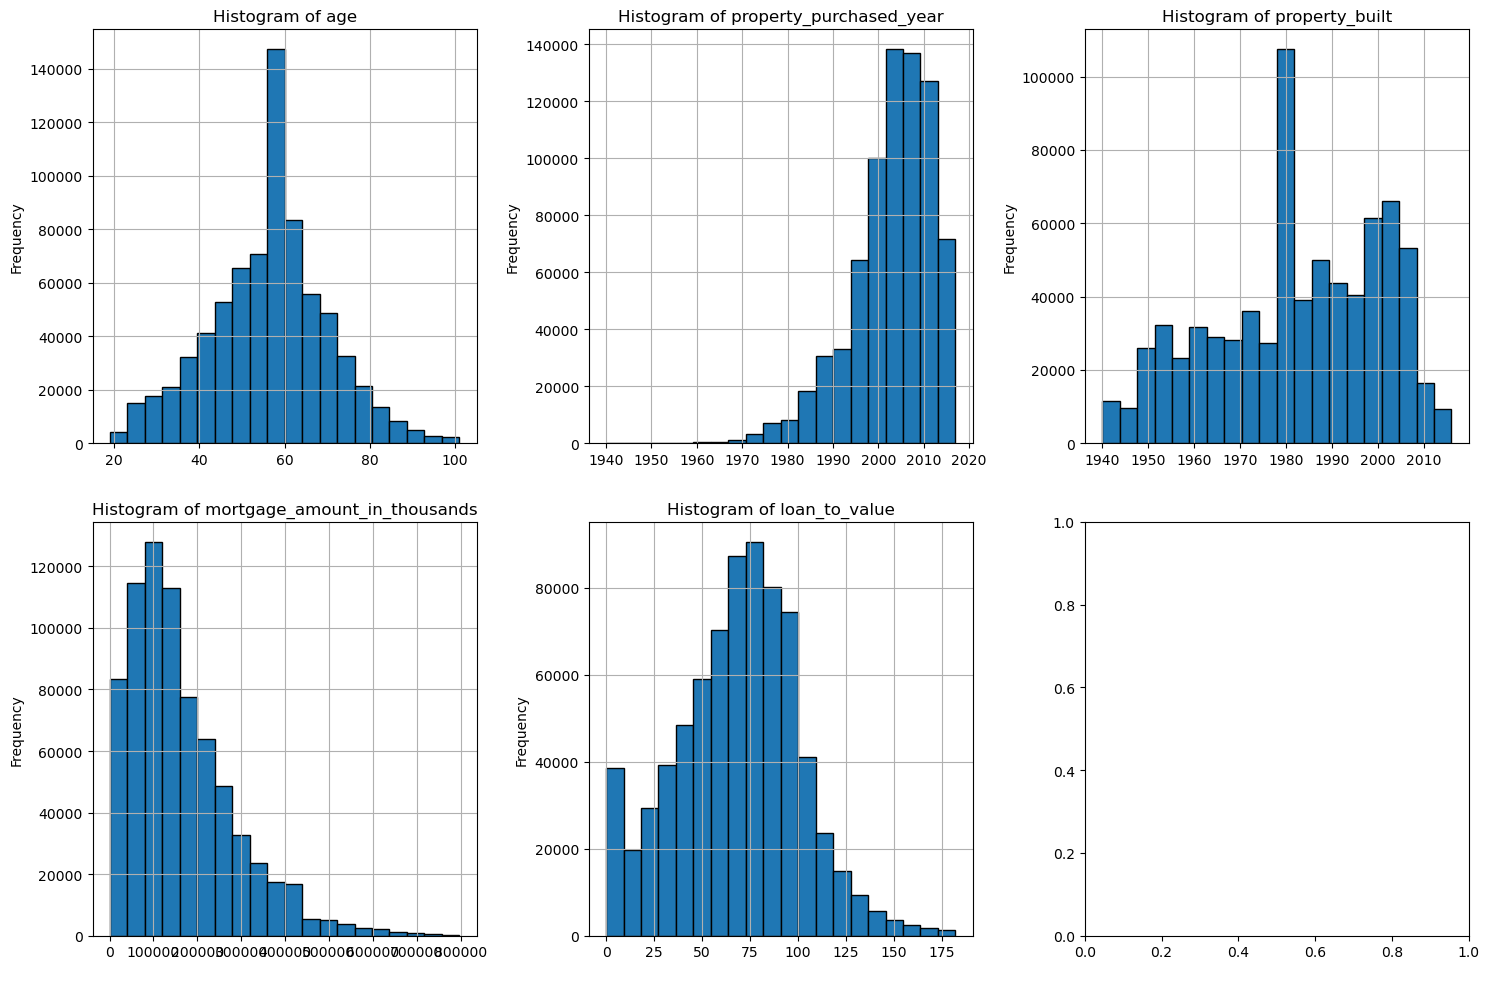

In [35]:
columns_to_keep = [
    'city', 'county', 'state', 'property_type', 'gender', 'age',
    'property_purchased_year', 'property_built',
    'mortgage_amount_in_thousands', 'lender_name', 'interest_type',
    'loan_type', 'loan_to_value'
]
filtered_data = data[columns_to_keep]

histogram_columns = [
    'age', 'property_purchased_year', 'property_built', 
    'mortgage_amount_in_thousands', 'loan_to_value'
]

num_rows = 2
num_cols = len(histogram_columns) // num_rows + len(histogram_columns) % num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(histogram_columns):
    axes[i].hist(filtered_data[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


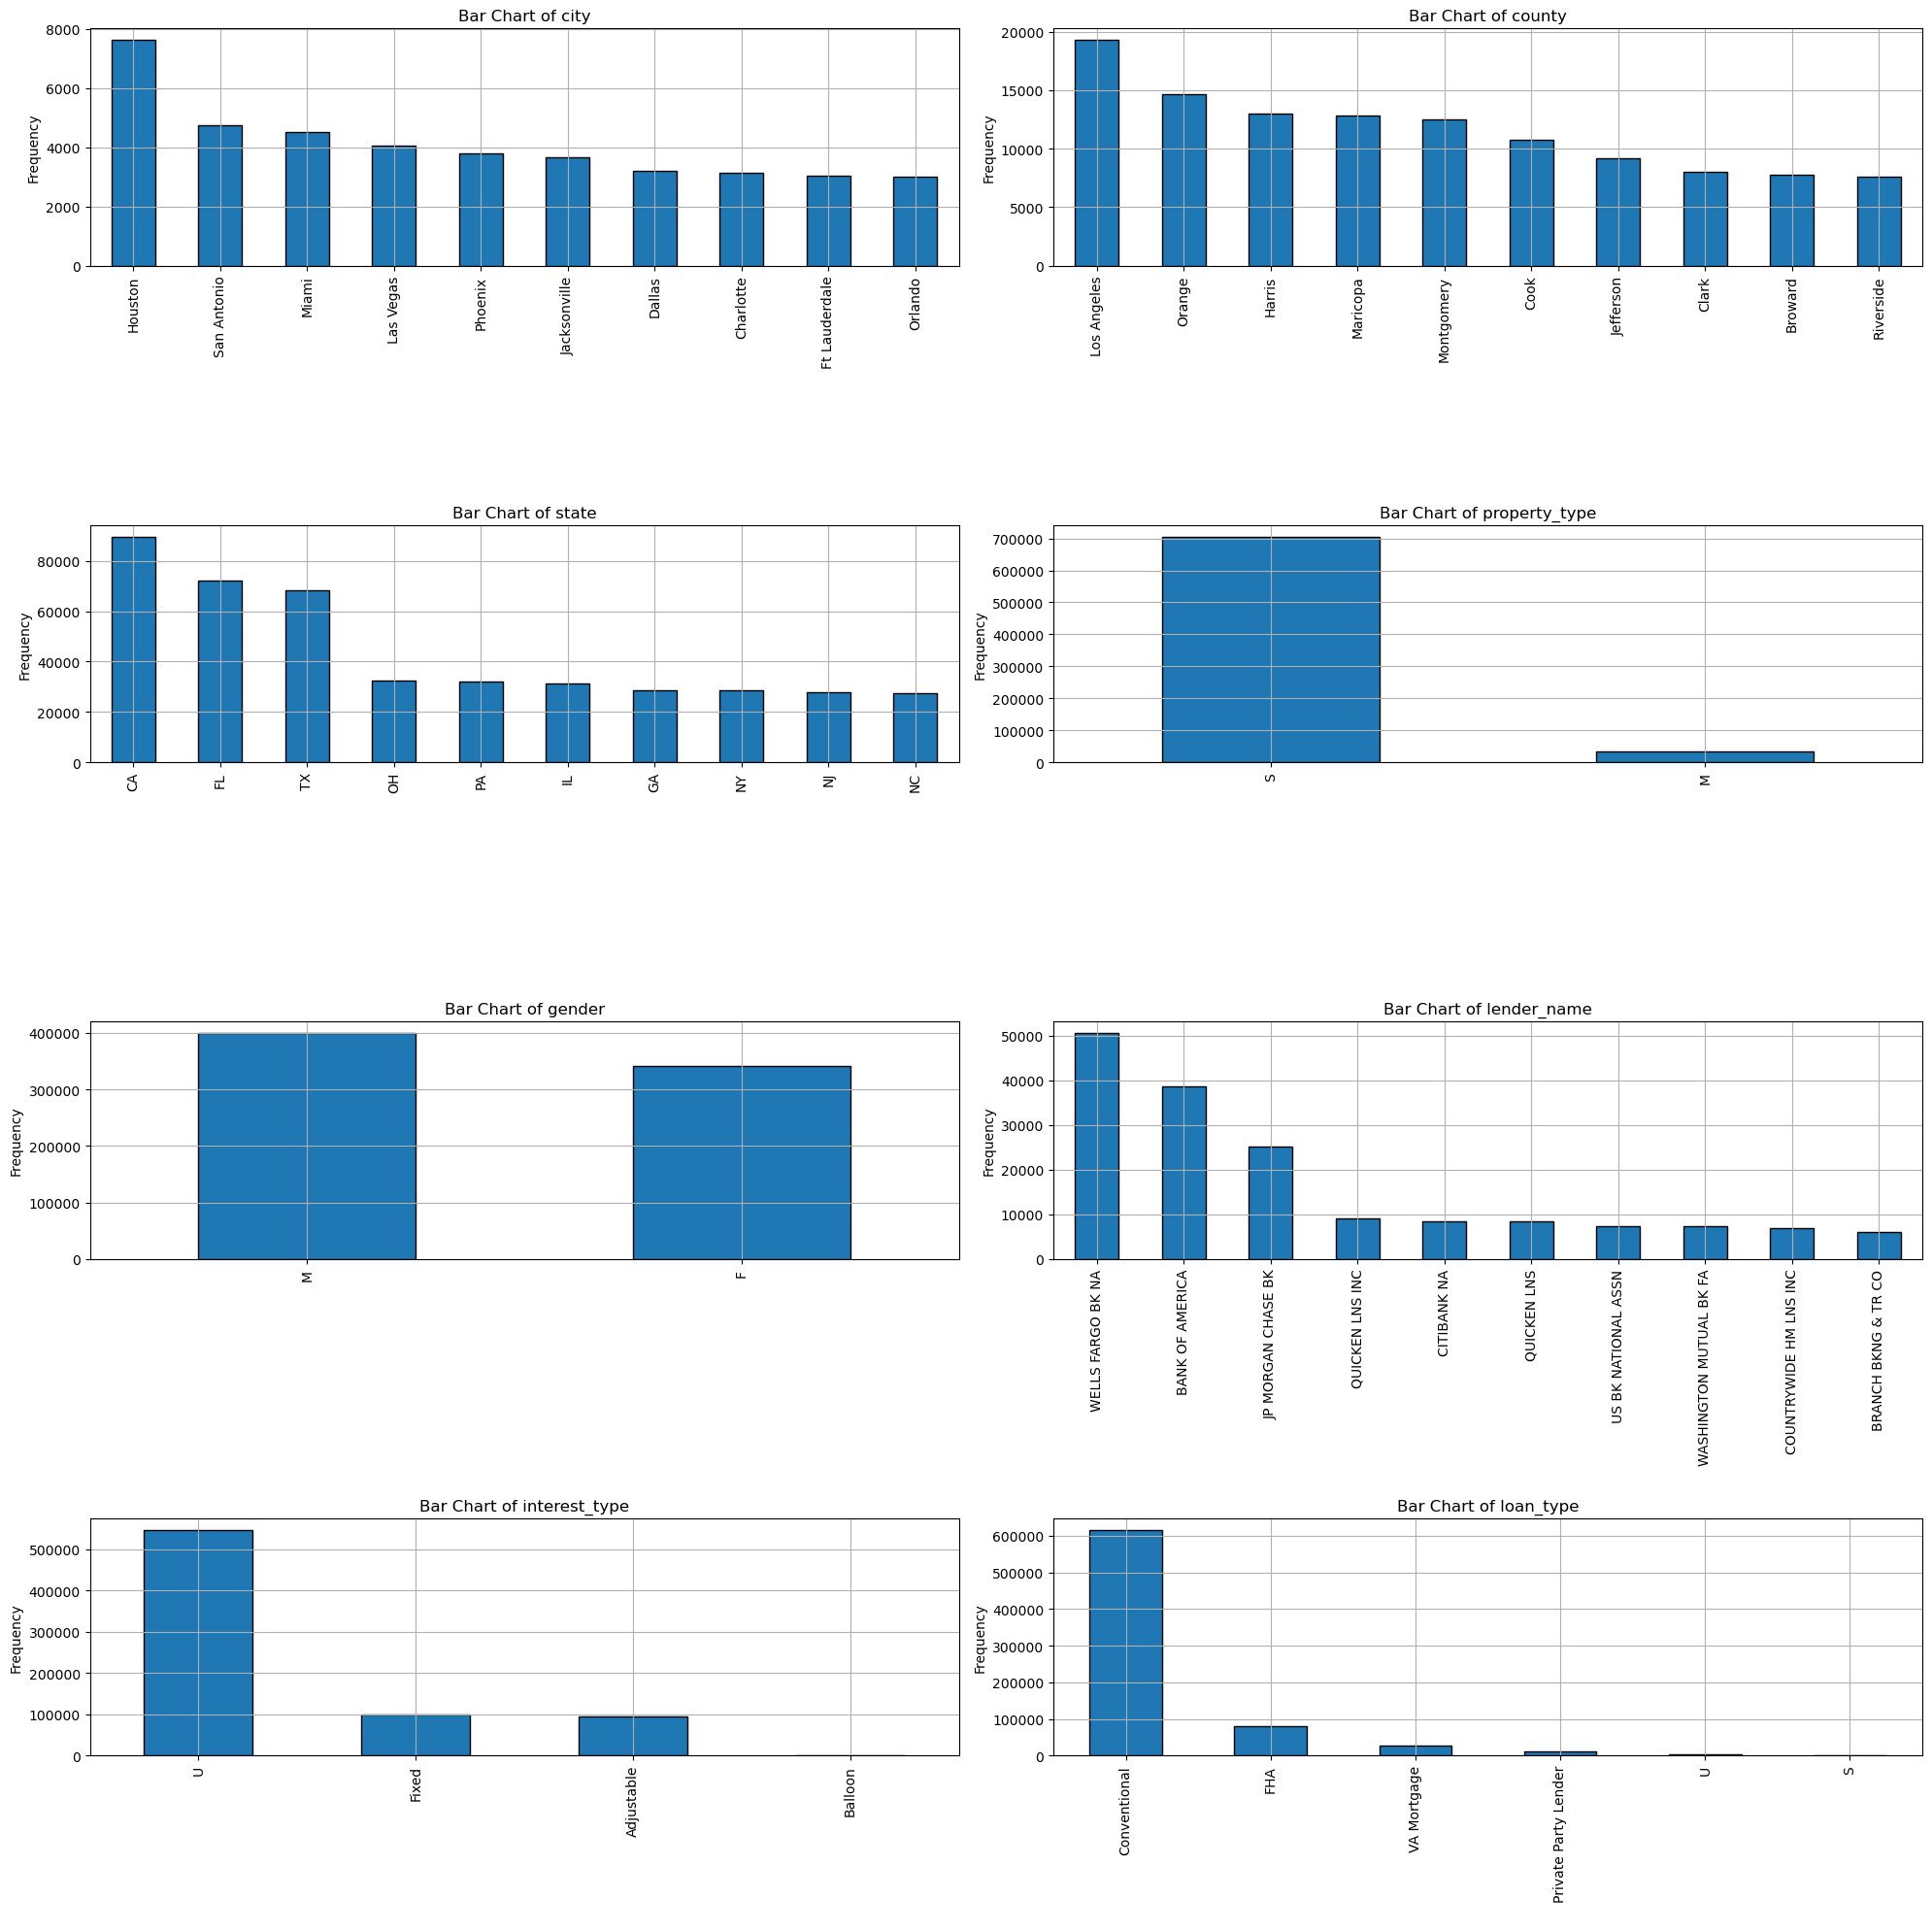

In [39]:
filtered_data = data[columns_to_keep]

bar_chart_columns = [
    'city', 'county', 'state', 'property_type', 'gender',
    'lender_name', 'interest_type', 'loan_type'
]

num_rows = 4
num_cols = len(bar_chart_columns) // num_rows + len(bar_chart_columns) % num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

sampled_data = filtered_data.sample(frac= 1.0)

for i, column in enumerate(bar_chart_columns):
    top_values = sampled_data[column].value_counts().nlargest(10)
    top_values.plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()